<a href="https://colab.research.google.com/github/farihane-redouan/BASIC-ALGORITHMS-MACHINE-DEEP-LEARNING/blob/main/tp8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [187]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt 
import os
import h5py as h5
import seaborn as sns
import pandas as pd

In [188]:
from google.colab import files
uploaded = files.upload()
f=[]
for fn in uploaded.keys():
  f.append(h5.File(os.path.join(fn),'a'))

Saving 1.mat to 1 (10).mat
Saving 2.mat to 2 (8).mat
Saving 3.mat to 3 (8).mat
Saving 4.mat to 4 (8).mat
Saving 5.mat to 5 (4).mat
Saving 6.mat to 6 (4).mat
Saving 7.mat to 7 (4).mat
Saving 8.mat to 8 (3).mat
Saving 9.mat to 9 (3).mat
Saving 10.mat to 10 (3).mat


In [221]:
class Patient(object):
  PID=""
  image=""
  label=""
  tumorBorder=""
  tumorMask=""
  def __init__(self,PID,image,label,tumorBorder,tumorMask):
    self.PID=PID
    self.image=image
    self.label=label
    self.tumorBorder=tumorBorder
    self.tumorMask=tumorMask


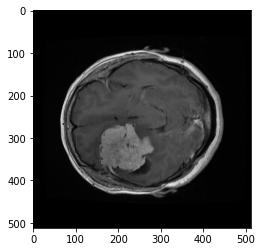

In [222]:
plt.imshow(f[2]['/cjdata/image'],cmap='gray')

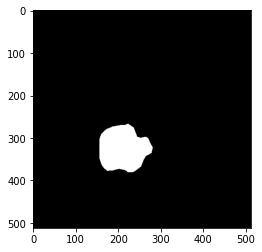

In [223]:
plt.imshow(f[2]['/cjdata/tumorMask'],cmap='gray')

In [224]:
print(np.shape(f[2]['/cjdata/image'])) # image
print(np.shape(f[2]['/cjdata/label'])) # malade ou non c'est la sible 0 ou 1
print(np.shape(f[2]['/cjdata/PID'])) 
print(np.shape(f[2]['/cjdata/tumorBorder']))
print(np.shape(f[2]['/cjdata/tumorMask'])) # image qui reprisente ou ilya le problem

(512, 512)
(1, 1)
(6, 1)
(1, 58)
(512, 512)


In [225]:
p=[]
for i in range(0,9):
  p.append(Patient('','','','',''))
  p[i].PID=np.array(f[i]['/cjdata/PID'])
  p[i].image=np.mat(f[i]['/cjdata/image'])
  p[i].label=f[i]['/cjdata/label']
  p[i].tumorBorder=f[i]['/cjdata/tumorBorder'][0]
  p[i].tumorMask= list(f[i]['/cjdata/tumorMask'])[0]

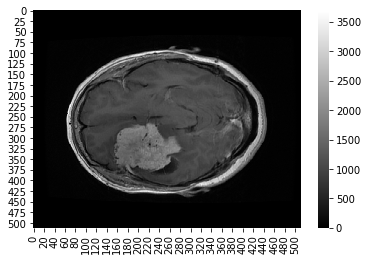

In [226]:
sns.heatmap(p[2].image, cmap='gray')

In [232]:
colums=['PID','image','label','tumorBorder', 'tumorMask']
d={'PID':[],'image':[],'label':[],'tumorBorder':[], 'tumorMask':[]}
for i in range(0,3):
  d['PID'].append(p[i].PID)
  d['image'].append(p[i].image)
  d['label'].append(p[i].label)
  d['tumorBorder'].append(p[i].tumorBorder)
  d['tumorMask'].append(p[i].tumorMask)

In [238]:
data=pd.DataFrame(list(d.values()),colums)

In [241]:
data=data.transpose()
data

,PID,image,label,tumorBorder,tumorMask
0,"[[49], [48], [48], [51], [54], [48]]",[[[[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[[1.0]],"[267.6152450090744, 231.37568058076226, 277.83...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[[49], [48], [48], [51], [54], [48]]",[[[[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[[1.0]],"[319.33101045296166, 153.42160278745644, 302.3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[[49], [48], [48], [51], [54], [48]]",[[[[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[[1.0]],"[280.08362369337976, 173.0452961672474, 273.83...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
